# All about curves

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import welly
welly.__version__

'0.3.3'

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well

In [3]:
w = Well.from_las('P-129_out.LAS')

## Curves

Just a list of objects.

In [4]:
w.data  # Just a dict of data objects.

{'CALI': Curve([ 2.44381547,  2.44381547,  2.44381547, ...,  2.42026806,
         2.42026806,  2.42026806]),
 'DPHI_DOL': Curve([  2.59099990e-01,   2.59099990e-01,   2.59099990e-01, ...,
          5.41675720e+02,   5.41675720e+02,   5.41675720e+02]),
 'DPHI_LIM': Curve([  1.98440000e-01,   1.98440000e-01,   1.98440000e-01, ...,
          5.85941528e+02,   5.85941528e+02,   5.85941528e+02]),
 'DPHI_SAN': Curve([ 0.15748   ,  0.15748   ,  0.15748   , ...,  0.54641998,
         0.54641998,  0.54641998]),
 'DRHO': Curve([ 0.19423294,  0.19423294,  0.19423294, ...,  0.06139515,
         0.06139515,  0.06139515]),
 'DT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'DTS': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'GR': Curve([ 46.69865036,  46.69865036,  46.69865036, ...,  92.24622345,
         92.24622345,  92.24622345]),
 'HCAL': Curve([ 4.39128494,  4.39128494,  4.39128494, ...,         nan,
                nan,         nan]),
 'NPHI_DOL': Curve([ 0.30186,  0.30186,  0.301

## Instantiating a new curve

In [5]:
from welly import Curve

In [6]:
p = {'mnemonic': 'FOO', 'run':0, }
data = [20, 30, 40, 20, 10, 0, 10]
c = Curve(data, basis=[2,3,4,5,6,7,8], params=p)

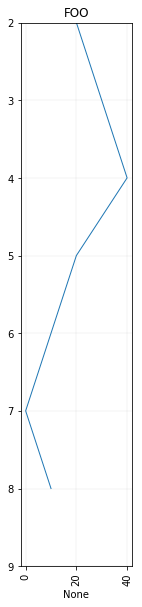

In [7]:
c.plot()

## Curve info

In Jupyter Notebook, the `__repr__()` is a little table summarizing the curve data...

In [8]:
gr = w.data['GR']
gr

Curve([ 46.69865036,  46.69865036,  46.69865036, ...,  92.24622345,
        92.24622345,  92.24622345])

`Curve` objects are just `ndarray`s, so we get lots of things for free...

In [9]:
m = np.mean(gr)

In [10]:
m  # Not really sure why this is a Curve

Curve(78.9863535887685)

In [11]:
gr.mnemonic

'GR'

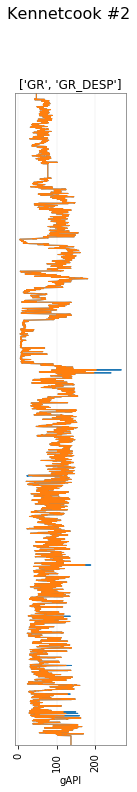

In [12]:
w.data['GR_DESP'] = gr.despike(window_length=50, z=2)
w.plot(tracks = [['GR', 'GR_DESP']])

## Plotting and reading

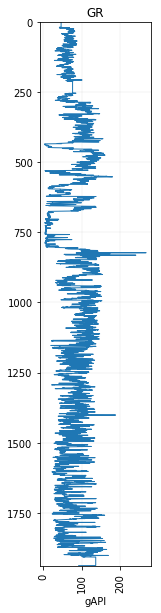

In [13]:
gr.plot(lw=0.5)

There's also an experimental 'imshow'-style 2D plot.

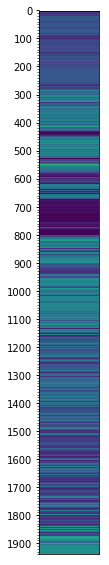

In [14]:
gr.plot_2d()

In [15]:
gr.read_at(1001)

97.991123408843123

In [16]:
gr.read_at([1001, 1003, 1004])

array([  97.99112341,  116.8162655 ,  104.1488654 ])

## Despike

You can despike with a window length for the trend and a Z-score to clip at — the curve is compared to the median *in the window* using the standard deviation *from the entire curve*. Here's the difference:

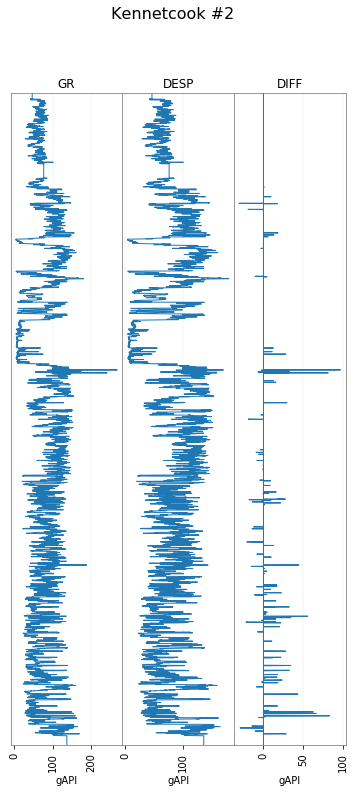

In [17]:
w.data['DESP'] = gr.despike(z=1)
w.data['DIFF'] = gr - w.data['DESP']
w.plot(tracks=['GR', 'DESP', 'DIFF'])

## Changing basis

You can easily upscale a bit by changing the step:

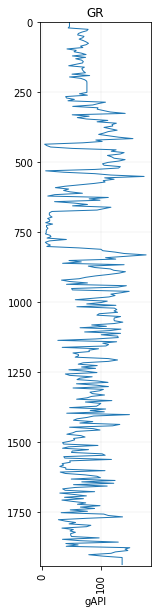

In [18]:
gr.to_basis(step=5).plot()

Or take out a segment of the log:

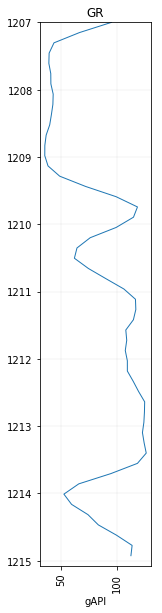

In [19]:
newb = gr.to_basis(start=1207, stop=1215)
newb.plot()

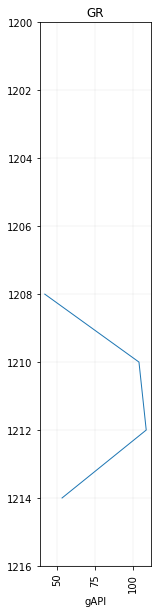

In [20]:
silly = newb.to_basis(start=1200, step=2)
silly.plot()

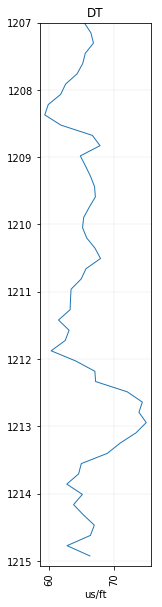

In [21]:
dt = w.data['DT']
dt.to_basis_like(newb.basis).plot()

## Getting a segment of the data

In [22]:
segment = gr.to_basis(start=600, stop=680)

In [23]:
segment.basis[-1]

679.85759999997026

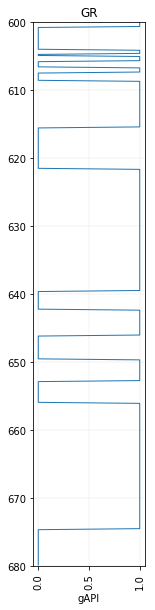

In [24]:
segment.block(cutoffs=50).plot()

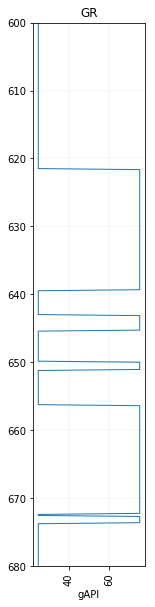

In [25]:
segment.block(values=(25, 75)).plot()

You can use a cutoff of, say, 50 API, then reassign the output values to whatever you like:

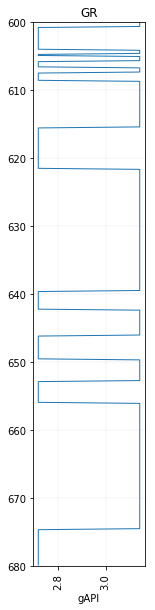

In [26]:
segment.block(cutoffs=50, values=(2.718, 3.142)).plot()

You can send a function in to determine replacement values from the original log. E.g., to replace the values with the block means:

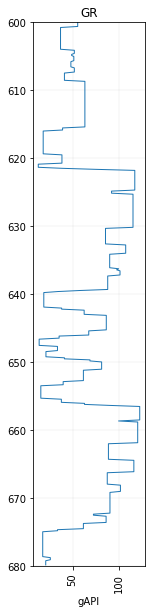

In [27]:
segment.block(cutoffs=[25, 50, 75, 100], function=np.mean).plot()